# The Science of Stolen Data
&nbsp;By Emma Adelmann<br>

## Introduction

* **Problem**: The prevalence of large-scale data breaches and their far-reaching effects
* **Background**: <br>
&emsp;&emsp;
A *data breach* is the exposure of data to parties who are not authorized to access it. A data breach can be caused by digital vulnerabilities, but may also be caused by the direct actions of humans (for example, theft or human error). Culprits include "accidental insiders" -- those who may stumble across confidential data without having the proper permissions to view it. Even an accidental viewing of the secret data is considered a breach. In some cases, a device containing the data may be lost or stolen. There are also malicious insiders and outsiders who aim to access confidential data, possibly using it to harm a company and its customers [5]. For the average user, credentials and personal information may be made available to the public, leaving them vulnerable to hackers. Depending on nature of the information that was leaked, the user could fall victim to identity fraud. If passwords were leaked (and if a user is among the 65% who reuse their passwords across websites and services), cybercriminals could compromise other accounts across the internet without having to use any sophisticated methods [4].<br>
&emsp;&emsp;
In the United States, if a data breach of an entity exposes any personally identifiable information belonging to users, then the entity is required by law -- depending on the state -- to disclose the breach and notify the affected users [7]. After the breach, the victim can do little to take back the information that has been leaked. However, they may harden their security to make such an attack less likely in the future.
* **Questions**:
    - Who/what is the primary culprit behind data breaches?
    - When it comes to data security (weighing both the frequency and magnitude of incidents), should an organization bolster their physical security in order to protect digital assets?
    - Is there a geographic pattern to these data breaches? If so, where do they take place most often?
    - Does a breach typically take place over a long or short period of time? During what year did the most data breaches take place?
    - Have threat trends (i.e the type of breach) evolved over the years?
* **Justification**: <br>
&emsp;&emsp;
In 2019, the average cost of cleaning up a data breach was over 8 million dollars -- with the healthcare industry being hit the hardest [6]. When we consider the sometimes priceless nature of data, we can understand that a data breach is clearly something that governments, organizations, and end users would wish to prevent. However, in order to do so, we must find out who or what is resposible for the majority of breaches. Once we have this information, we can harden our systems and introduce new security policies to lower the likelihood of a breach.<br>
&emsp;&emsp;
It is becoming increasingly clear that physical security is innately intwined with cybersecurity. The US Cybersecurity & Infrastructure Security Agency recommends the use of a "holistic" approach to physical security and cybersecurity, as opposed to a "siloed" approach in which they are treated as two separate responsibilities (leading to less coordination within the organization and more attacks) [2]. This is particularly relevant to IoT and IIoT systems, but does it also apply to data security?<br>
&emsp;&emsp;
According to IBM, it takes 280 days on average to both detect and respond to a data breach [1]. This could mean that the organization simply took a long time to find evidence of the incident, or the attacker (if any) could have had constant access to the breached information for a period of time. This extended breach could spell trouble for both the targeted organization and its users.
* **Datasets**: https://www.kaggle.com/alukosayoenoch/cyber-security-breaches-data
* **Explanation of the Data**: This dataset describes over 1000 data breaches taking place from 1997 to 2014. It includes information on the location of the breached info, affected parties, type of breach, and when it took place. 
* **Ethical Concerns/Considerations**:
    - As defenders gain more information about the state of cybersecurity, so too do attackers. However, the information must remain accessible to increase the chances of more "good guys" and good-guys-in-training coming across it.
    - In many cases, data from a breach is leaked on the internet. Services like https://haveibeenpwned.com exist to search for compromised emails and passwords. You can also find dumps of leaked information through a simple Google search. No sensitive data is included in this dataset -- it is theoretically possible to look up the incident using the provided details and then trying to locate the leaked data, but I do not see this being a significant issue. There is usually no real need for a hacker to look up a specific incident, and it is public information anyway.
    - Organizations named in this dataset may experience damage to their reputations. This is unavoidable since they had to make their incident public in the first place. Analyzing such data allows us to better understand how and why data breaches occur, helping to prevent them from happening in the future.<br><br>

## Analysis

We'll start by importing the necessary libraries, reading in the data, and taking a look at it:

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import geopandas
import mapclassify

In [28]:
df = pd.read_csv("data/Cyber Security Breaches.csv")
df.head()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


**QUESTION**: Who/what is the primary culprit behind data breaches?<br>
Let's try answering the first question, using a bar graph to determine the frequency of various data breach causes.

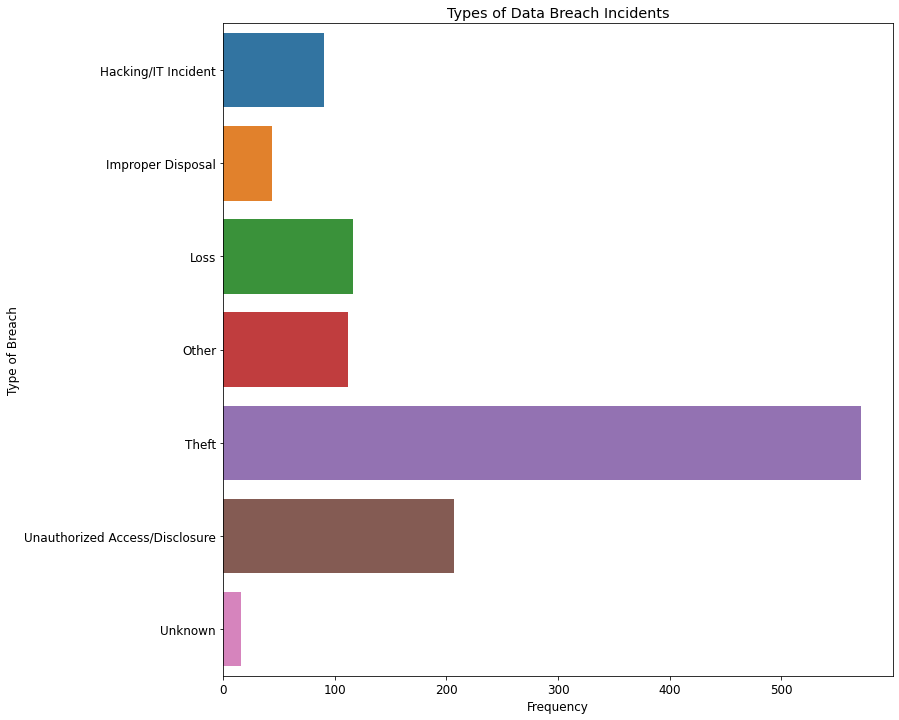

In [29]:
# main types: Theft, Unauthorized Access/Disclosure, Loss, Hacking/IT Incident, Improper Disposal, Other, Unknown
# this function puts any data breach 'types' that consist of multiple types (eg. Theft, Loss) into a list to be merged into the df later
def to_split_or_not_to_split(words):
    if ',' in words:
        word_list = words.split(',')
        for i in range(0, len(word_list)):
            word_list[i] = word_list[i].strip()
        return word_list
    else:
        return words.strip()

sep_df = df.copy(deep=True)
sep_df['Type_of_Breach'] = sep_df['Type_of_Breach'].apply(to_split_or_not_to_split)
sep_df = sep_df.explode('Type_of_Breach')
trends = sep_df.groupby('Type_of_Breach').agg({'Type_of_Breach': ['count']}).reset_index()
trends.columns = ['breach', 'count']

graphtype_df = pd.DataFrame(trends)
graphtype_df.sort_values(by=['breach'], inplace=True)

figure = plt.gcf()
figure.set_size_inches(12, 12)

sns.barplot(data = graphtype_df, y = 'breach', x = 'count')
plt.xlabel('Frequency')
plt.ylabel('Type of Breach')
plt.title('Types of Data Breach Incidents')
plt.show()

'Theft' appears to be the leading cause. But it may be more useful to view these frequencies relative to each other. Let's use a pie chart as a visualization:

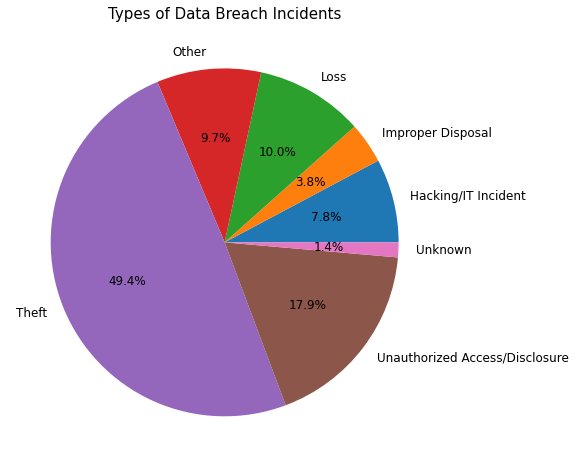

In [30]:
figure = plt.gcf()
figure.set_size_inches(8, 8)
plt.rcParams['font.size'] = 12

plt.pie(graphtype_df['count'].tolist(), labels = graphtype_df['breach'].tolist(), autopct='%1.1f%%')
plt.title("Types of Data Breach Incidents", fontsize = 15)
plt.show()

Are these frequencies really different to a significant degree? Let's find out with a Chi-Square Test.

In [31]:
statistic, p = stats.chisquare(graphtype_df['count'].tolist())
alpha = 0.05

print("Statistic:", statistic)
print("P-value:", p)
print()

if p < alpha:
    print("Since the p-value is less than 0.05, we reject the null hypothesis that the data does not have the given frequencies.")
else:
    print("Since the p-value is greater than 0.05, we accept the null hypothesis that the data does not have the given frequencies.")

Statistic: 1297.5242214532873
P-value: 3.7211317115354714e-277

Since the p-value is less than 0.05, we reject the null hypothesis that the data does not have the given frequencies.


The chi-square test proves that the data differs to a statistically significant degree. We can see here that the leading cause of data breach is "Theft". A rather low proportion is caused by hacking incidents, considering that they are commonly associated with modern data breaches.

**QUESTION**: When it comes to data security (weighing both the frequency and magnitude of incidents), should an organization bolster their physical security in order to protect digital assets?<br>
To answer this question, we must investigate the source of the data breach.

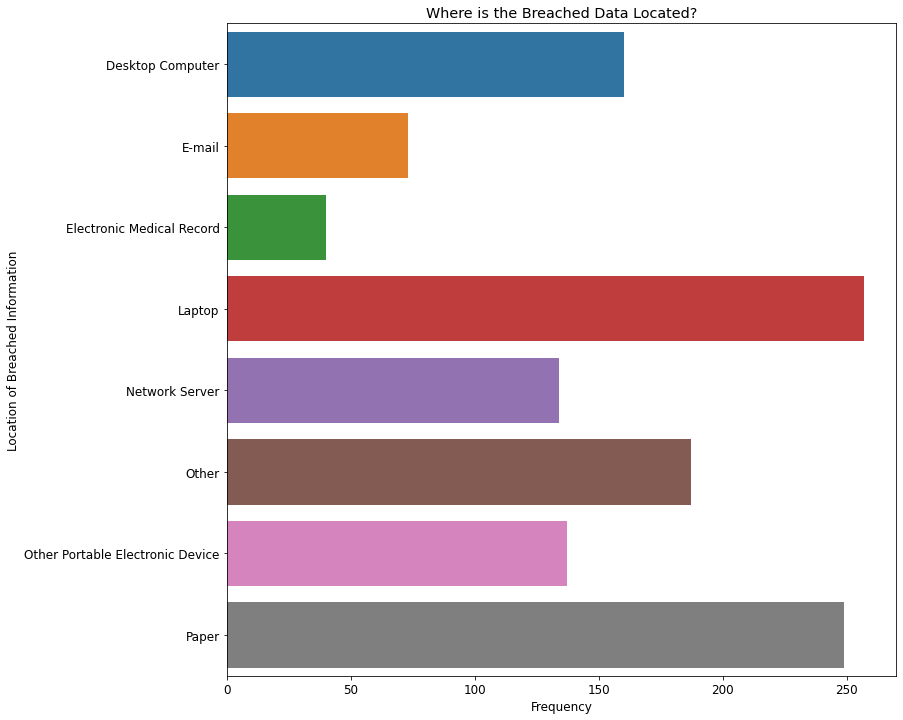

In [32]:
# main locations: 'Paper', 'Network Server', 'Other Portable Electronic Device', 'Laptop', 'Desktop Computer',
# 'Electronic Medical Record', 'E-mail', Other'

loc_df = df.copy(deep=True)
loc_df['Location_of_Breached_Information'] = loc_df['Location_of_Breached_Information'].apply(to_split_or_not_to_split)
loc_df = loc_df.explode('Location_of_Breached_Information')
locations = loc_df.groupby('Location_of_Breached_Information').agg({'Location_of_Breached_Information': ['count']}).reset_index()
locations.columns = ['breach_location', 'count']

graphloc_df = pd.DataFrame(locations)
graphloc_df.sort_values(by=['breach_location'], inplace=True)

figure = plt.gcf()
figure.set_size_inches(12, 12)

sns.barplot(data = graphloc_df, y = 'breach_location', x = 'count')
plt.xlabel('Frequency')
plt.ylabel('Location of Breached Information')
plt.title('Where is the Breached Data Located?')
plt.show()

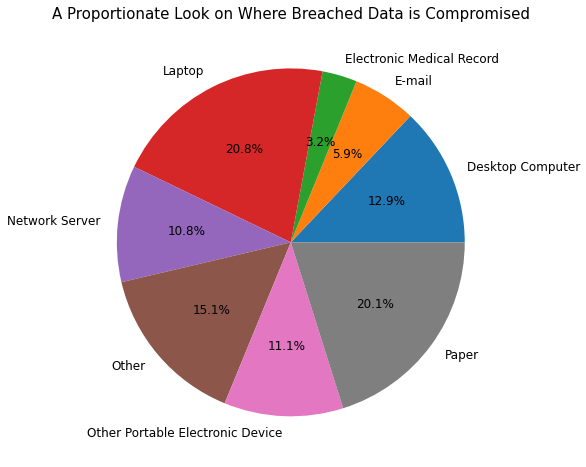

In [33]:
figure = plt.gcf()
figure.set_size_inches(8, 8)
plt.rcParams['font.size'] = 12
plt.pie(graphloc_df['count'].tolist(), labels = graphloc_df['breach_location'].tolist(), autopct='%1.1f%%')
plt.title("A Proportionate Look on Where Breached Data is Compromised", fontsize = 15)
plt.show()

These results are a little more mixed. We will do another chi-square test to determine whether these results are significant.

In [34]:
statistic, p = stats.chisquare(graphloc_df['count'].tolist())
alpha = 0.05

print("Statistic:", statistic)
print("P-value:", p)
print()

if p < alpha:
    print("Since the p-value is less than 0.05, we reject the null hypothesis that the data does not have the given frequencies.")
else:
    print("Since the p-value is greater than 0.05, we accept the null hypothesis that the data does not have the given frequencies.")

Statistic: 265.1697655618432
P-value: 1.6292204152111134e-53

Since the p-value is less than 0.05, we reject the null hypothesis that the data does not have the given frequencies.


The differences are indeed statistically significant; however, the chi-square statistic is smaller than the one in the previous test, indicating weaker results. Indeed, the results here are much more mixed, and much of the data is unspecified or unaccounted for (placed in the 'Other' category). 'Laptop' and 'Paper' appear to be the most common singular locations of breached information. Information on paper is a very common vector of breached information, despite it having seemingly little to do with information security. If you combine this idea with that theft is the single most common type of breach, then we see that physical security is something that is commonly overlooked (and exploited as a result). Businesses, organizations, and cybersecurity professionals should seek to bolster their physical security to close off these very popular attack vectors.

**QUESTION**: Is there a geographic pattern to these data breaches? If so, where do they take place most often?<br>
To help answer this question, I will use a map visualization.

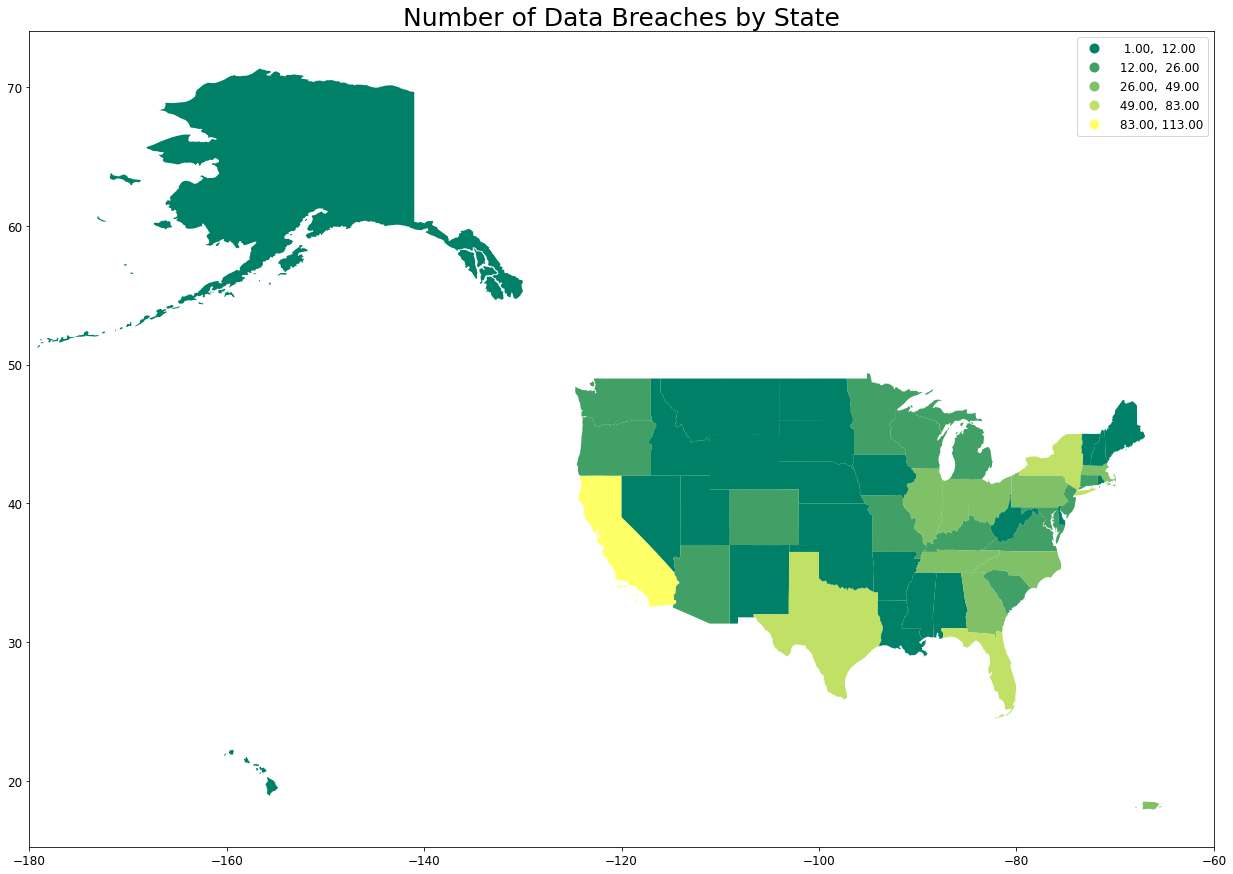

In [35]:
stateframe = pd.DataFrame(df['State'].value_counts(), dtype='int64').reset_index()
stateframe.rename(columns={'index':'STUSPS', 'State':'FREQ'}, inplace = True)

geo_usa = geopandas.read_file('data/cb_2019_us_state_20m')
geo_merge = geo_usa.merge(stateframe, on='STUSPS')
geo_merge.plot(column='FREQ', scheme='fisher_jenks', figsize=(25, 15), legend=True, cmap='summer')
plt.xlim(-180,-60)
plt.title('Number of Data Breaches by State',fontsize=25)
plt.show()

We can see from the map that California has a rather high number of data breaches. It is followed in popularity by Texas, Florida, and New York. Given that these states all have well-known, densely populated city centers, it is likely that they are home to many high-profile corporations and large hospitals. Such entities hold a wealth of data to be targeted by attackers, and many employees who could leak it. These reasons could possibly be contributing to the increase of attacks in those areas.

**QUESTION**: Does a breach typically take place over a long or short period of time? During what year did the most data breaches take place?<br>

In [36]:
"""
Consumes two strings representing a date
Returns the number of days between the two dates.
"""
def subdate(date1, date2):
    # YYYY-MM-DD
    if pd.isnull(date1) or pd.isnull(date2):
        return 0
    date1 = pd.to_datetime(date1)
    date2 = pd.to_datetime(date2)
    return (date1 - date2).days

timedata = df.apply(lambda x : subdate(x['breach_end'], x['breach_start']), axis=1)
print(timedata.describe())
print("\nMedian:", timedata.median())

count    1055.000000
mean       33.485308
std       200.781002
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2891.000000
dtype: float64

Median: 0.0


We can see here that the mean breach length is about 33 days. However, the median is 0 as many breach end dates are unaccounted for.

In [37]:
years = df['year'].value_counts().sort_values(ascending=False)
years

2013    254
2011    229
2012    227
2010    211
2009     56
2014     56
2008     13
2004      2
2005      2
1997      1
2002      1
2003      1
2006      1
2007      1
Name: year, dtype: int64

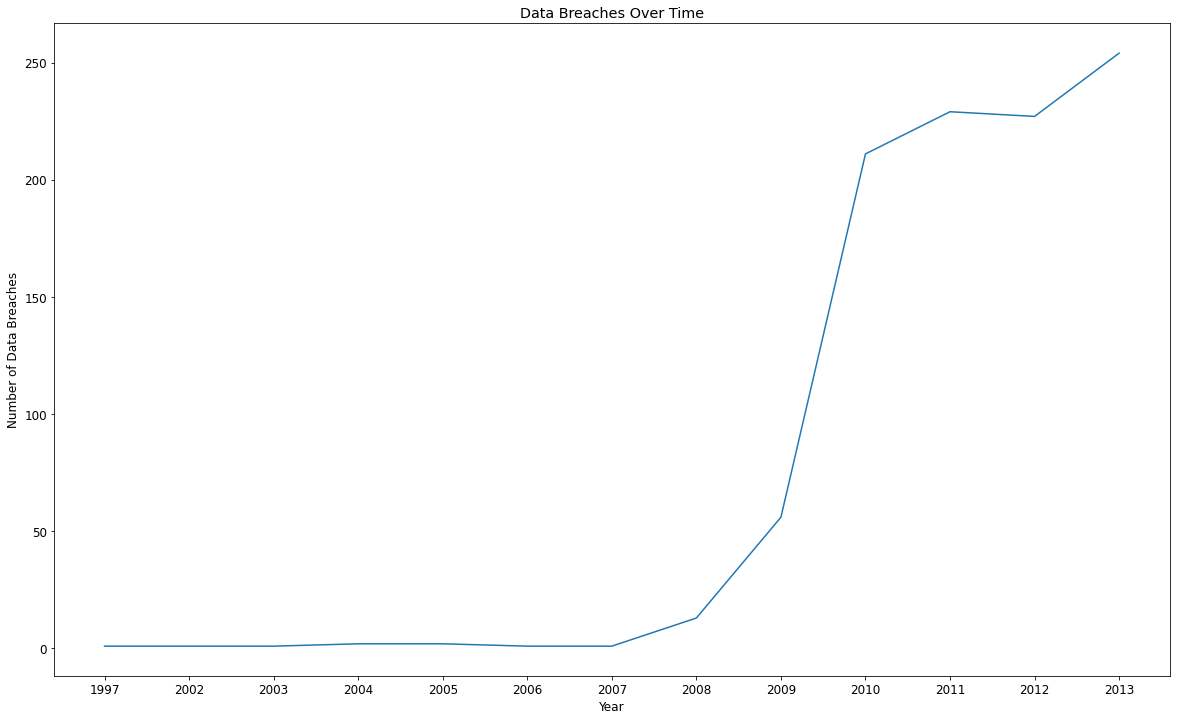

In [38]:
year_df = pd.DataFrame(years).reset_index()
year_df.rename(columns = {'year' : 'freq', 'index' : 'year'}, inplace=True)
year_df.sort_values(by=['year'], inplace=True)
year_df['year'] = year_df['year'].astype(str)
# filter out 2014 due to incomplete data
year_df = year_df[year_df['year'] != '2014']

figure = plt.gcf()
figure.set_size_inches(20, 12)
plt.plot(year_df['year'], year_df['freq'])
plt.title('Data Breaches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Data Breaches')
plt.show()

Based on this visualization, the frequency of data breaches has generally trended upwards over the years 1997-2013. Due to the world's advancements in technology over time, as well as its increasing dependence on electronic records, this result could be considered inevitable [3].

**QUESTION**: Have threat trends (i.e the type of breach) evolved over the years? <br>
In hopes of answering this question, I will explore whether there is a relationship between breach type and time.

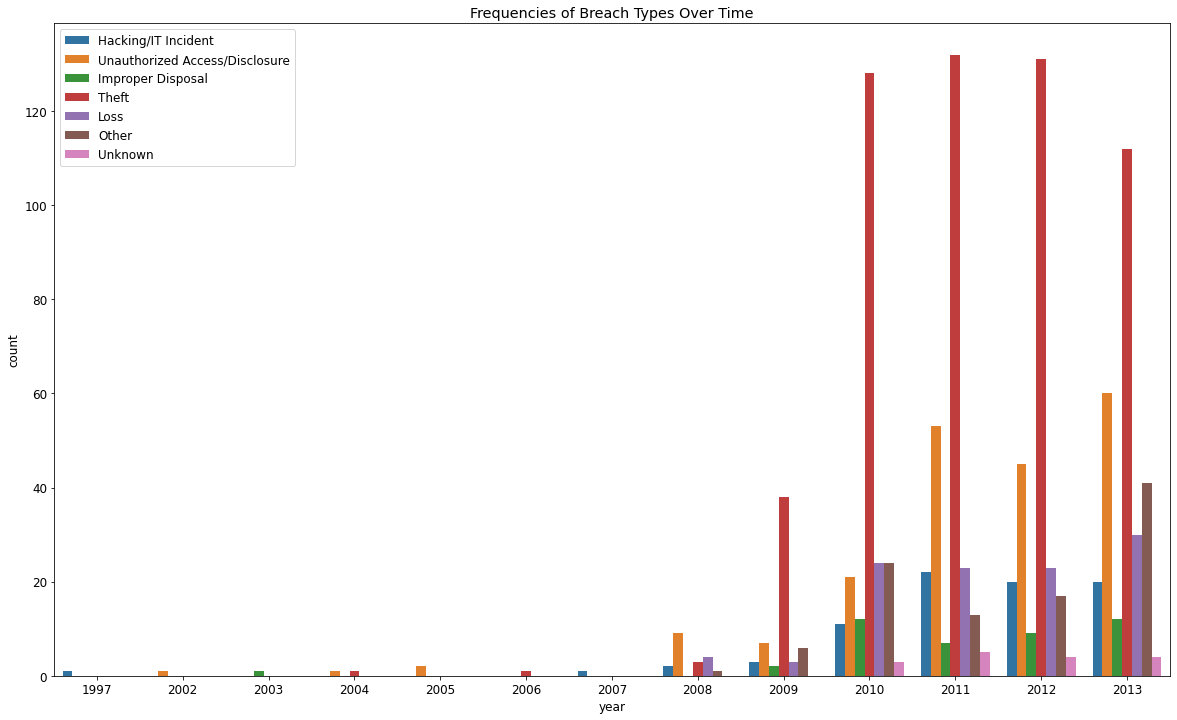

In [39]:
sep_df = df.copy(deep=True)
sep_df = sep_df[sep_df['year'] != 2014]
sep_df['Type_of_Breach'] = sep_df['Type_of_Breach'].apply(to_split_or_not_to_split)
sep_df = sep_df.explode('Type_of_Breach')
trends = sep_df.groupby(['year', 'Type_of_Breach']).agg({'Type_of_Breach': ['count']}).reset_index()
trends.columns = ['year', 'breach', 'count']

figure = plt.gcf()
figure.set_size_inches(20, 12)
sns.barplot(x  = 'year', y = 'count', hue = 'breach', data = trends)
plt.title('Frequencies of Breach Types Over Time')
plt.legend(loc='upper left')
plt.show()

By looking at the graph, we can observe the greatest overall frequencies from 2010 to 2013. These are the years of most interest, and by studying them we may be able to learn about the future. Have data breach methods really evolved over the years, or are they staying about the same? To determine whether there is a significant difference between the spread of observed values from year to year, let's perform the One-Way ANOVA test.

In [40]:
yearlist = [1997, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
typelist = ['Hacking/IT Incident', 'Improper Disposal', 'Loss', 'Other', 'Theft', 'Unauthorized Access/Disclosure', 'Unknown']

def make_year_lists(years):
    ret = []
    
    for y in years:
    
        newList = []
        year_df = trends[(trends == y).any(axis=1)]
        breaches = year_df['breach'].tolist()
        counts = year_df['count'].tolist()

        incount = 0
        for j in range(0, len(typelist)):
            if incount >= len(breaches) or breaches[incount] != typelist[j]:
                newList.append(0)
            else:
                newList.append(counts[incount])
                incount += 1
    
        ret.append(newList)
        
    return ret

def interpret_result(statistic, p, alpha):
    print("Statistic:", statistic)
    print("P-value:", p)
    print()

    if p < alpha:
        print("Since the p-value is less than 0.05, we reject the null hypothesis that the groups have the same population mean.")
    else:
        print("Since the p-value is greater than 0.05, we accept the null hypothesis that the groups have the same population mean.")
    
    print("TEST END\n\n")

tbt = make_year_lists([2012, 2013])
statistic, p = stats.f_oneway(tbt[0], tbt[1])
interpret_result(statistic, p, 0.05)
tbt = make_year_lists([2011, 2012])
statistic, p = stats.f_oneway(tbt[0], tbt[1])
interpret_result(statistic, p, 0.05)
tbt = make_year_lists([2010, 2011])
statistic, p = stats.f_oneway(tbt[0], tbt[1])
interpret_result(statistic, p, 0.05)

Statistic: 0.03894418000865426
P-value: 0.8468624584074418

Since the p-value is greater than 0.05, we accept the null hypothesis that the groups have the same population mean.
TEST END


Statistic: 0.0012941571202607488
P-value: 0.971894282177309

Since the p-value is greater than 0.05, we accept the null hypothesis that the groups have the same population mean.
TEST END


Statistic: 0.03759499712408062
P-value: 0.8495021038798722

Since the p-value is greater than 0.05, we accept the null hypothesis that the groups have the same population mean.
TEST END




The distributions appear to be similar from year to year. This suggests that these threat trends generally remain static, but are still prominent every year. We can observe from this that the dominant types of data breach are predictable enough that preventative measures can be easily planned. It is important that organizations take note of these trends and apply security measures accordingly.

## Conclusions

Analysis of this data has proven to be valuable in understanding the nature of data breaches. It was found that theft is the most common type of data breach, and that exposed data most commonly comes from paper and laptop sources. With this information in mind, we can imagine that a robust physical security program would do an excellent job of repelling many common data breach threats. In terms of geographic location, California has the highest number of data breaches, trailed by Texas, New York, and Florida.

But if cybersecurity is an ever-changing field, how can we predict these threats? In recent years, the general spread of data breach types has not changed significantly. This is good news for vulnerable businesses and organizations, since they don't necessarily need the most up-to-date data to start making a security plan.

This analysis is intended to guide business/government/organization leaders and security administrators in making decisions to protect their data. It is also meant to educate the general public -- there may be many among them whose data was compromised due to a breach. It is important that both businesses and their customers understand the causes and consequences of a data breach.

As with any data analysis, there are ethical implications here. Potential attackers could use this knowledge to their benefit. There is a risk in offering any kind of security information and training, since there are those who use it for malicious purposes as well as those who use it for good. However, experienced attackers are already extremely familiar with the threat landscape. Even if an inexperienced attacker or accidential insider would be the culprit, this data is more likely to empower the target organization to introduce measures to prevent such an attack.

## Sources
[1] “Cost of a Data Breach Study,” IBM, 2020. [Online]. Available: https://www.ibm.com/security/data-breach. [Accessed: 30-Apr-2021]. <br>
[2] “Cybersecurity and Physical Security Convergence,” Cybersecurity & Infrastructure Security Agency. [Online]. Available: https://www.cisa.gov/sites/default/files/publications/Cybersecurity%20and%20Physical%20Security%20Convergence_508_01.05.2021.pdf. [Accessed: 30-Apr-2021]. <br>
[3] J. De Groot, “The History of Data Breaches,” Digital Guardian, 01-Dec-2020. [Online]. Available: https://digitalguardian.com/blog/history-data-breaches. [Accessed: 25-May-2021].<br>
[4] K. Bowen, “Your Employees Are Reusing Passwords – Find Out How Many,” Infosecurity Magazine, 30-Jun-2020. [Online]. Available: https://www.infosecurity-magazine.com/blogs/your-employees-reusing-passwords/. [Accessed: 24-May-2021].<br>
[5] Kaspersky, “How Data Breaches Happen,” www.kaspersky.com, 26-Apr-2021. [Online]. Available: https://www.kaspersky.com/resource-center/definitions/data-breach. [Accessed: 30-Apr-2021]. <br>
[6] M. Puranik, “What Is The Cost Of A Data Breach?,” Forbes, 02-Dec-2019. [Online]. Available: https://www.forbes.com/sites/forbestechcouncil/2019/12/02/what-is-the-cost-of-a-data-breach/. [Accessed: 30-Apr-2021]. <br>
[7] P. Greenberg, “Security Breach Notification Laws,” National Conference of State Legislatures, 15-Apr-2021. [Online]. Available: https://www.ncsl.org/research/telecommunications-and-information-technology/security-breach-notification-laws.aspx. [Accessed: 30-Apr-2021]. <br>